In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
from PIL import Image 
from IPython.display import Image
%matplotlib inline

<class 'numpy.ndarray'>
Total available coins is 4


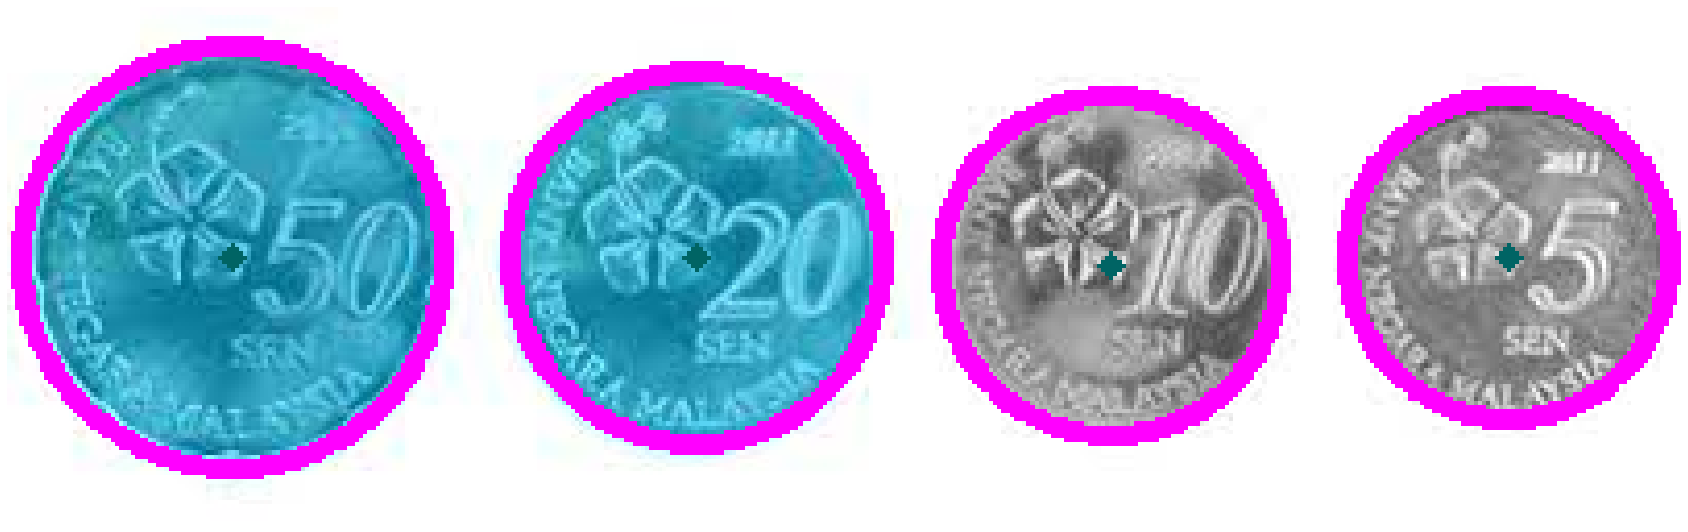

In [27]:
path = '/content/drive/MyDrive/Assignment1/'
filePath = path+'coin3.jpg'

images = []
circle = []

  #load img
img = cv2.imread(filePath)
images.append(img)

  #grayscale
gryimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
color_covert = cv2.cvtColor(gryimg, cv2.COLOR_BGR2RGB)

#blur
blurimg = cv2.medianBlur(gryimg, 9)

  #edge detection
canny = cv2.Canny(blurimg,100,250)

  #dilation
kernel = np.ones((1,1),np.uint8)
dilation = cv2.dilate(canny, kernel, iterations=1)

#hough transform
rows = dilation.shape[0]
circles = cv2.HoughCircles(dilation, cv2.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))
print(type(circles))
for i in circles[0,:]:
    # draw the outer circle
  cv2.circle(img, (i[0],i[1]), 1, (0, 100, 100), 3)
  cv2.circle(img, (i[0],i[1]), i[2], (255, 0, 255), 3)
  circle.append(i)

print('Total available coins is', len(circle)) 
plt.figure(figsize=[30,10])
num_cols = len(images)
num_rows = math.ceil(len(images) / num_cols)
for i in range(0, len(images)):
  plt.subplot(num_rows, num_cols, i+1) 
  plt.axis('off')
  plt.imshow(img)

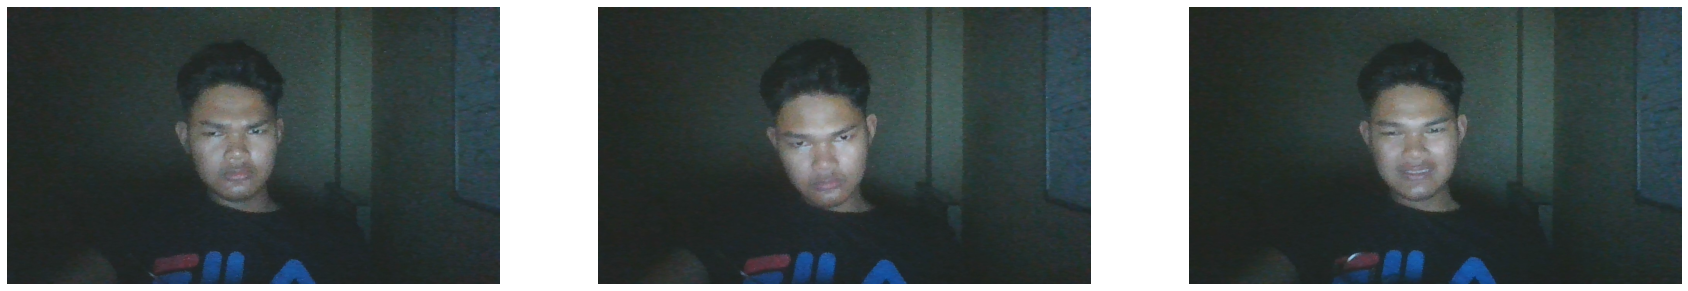

In [31]:
# Show the image which was just taken.
path = '/content/drive/MyDrive/Assignment1/photos/'
filePath = path+'1.jpg'
imagefiles = glob.glob(path+"*")
imagefiles.sort()
images = []
for filename in imagefiles:
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  images.append(img)
num_images = len(images)

plt.figure(figsize=[30,10]) 
num_cols = 3
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
  plt.subplot(num_rows, num_cols, i+1) 
  plt.axis('off')
  plt.imshow(images[i])

In [32]:
face_detect = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
face_data = face_detect.detectMultiScale(image1, 1.3, 5)

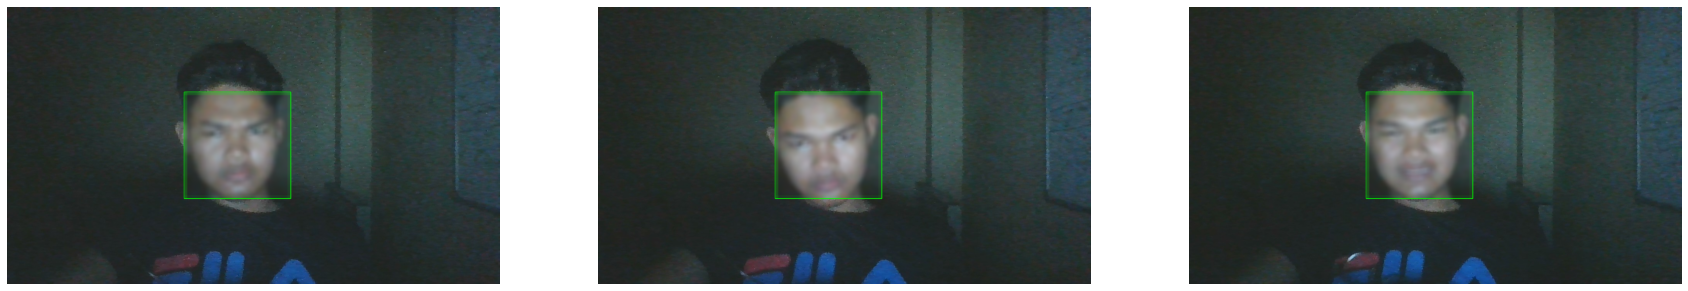

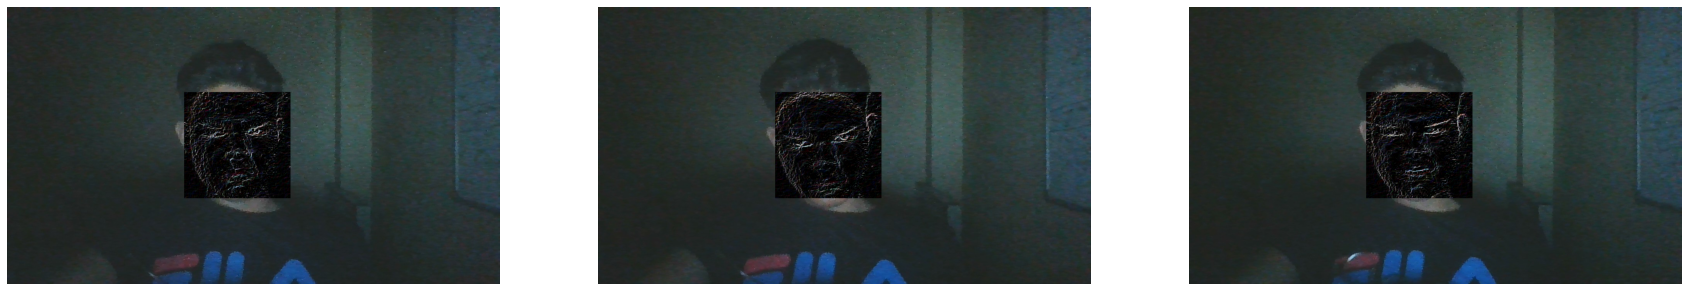

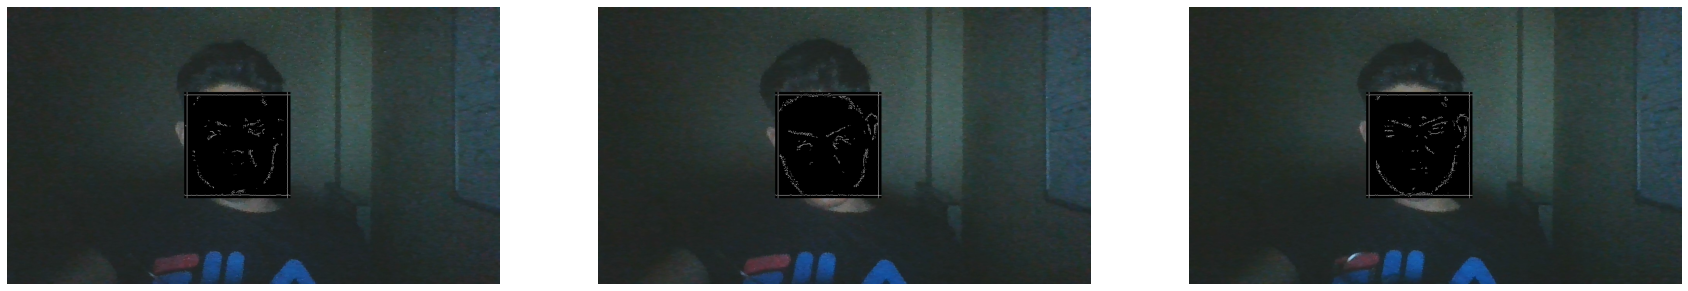

In [35]:
imgBlur = []
imgCanny = []
imgSobel = []

for img in images:
  image = img.copy()
  canny = image.copy()
  sobel = image.copy()

  for (x, y, w, h) in face_data:
    #draw rectangle
    detect = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    #apply blur
    blur = cv2.GaussianBlur(image[y:y+h, x:x+w], (15, 15), 10)
    image[y:y+h, x:x+w] = blur
    imgBlur.append(image)

    #apply sobel
    sobelx = cv2.Sobel(sobel[y:y+h, x:x+w], cv2.CV_8U,1,0,ksize=3)
    sobely = cv2.Sobel(sobel[y:y+h, x:x+w], cv2.CV_8U,0,1,ksize=3)
    imgsobel = sobelx + sobely
    sobel[y:y+h, x:x+w] = imgsobel
    imgSobel.append(sobel)

    #apply canny
    imgcanny = cv2.Canny(blur,35,35)
    imgcanny = imgcanny.reshape((imgcanny.shape[0], imgcanny.shape[1], 1))
    canny[y:y+h, x:x+w] = imgcanny
    imgCanny.append(canny)


#plot blur image
plt.figure(figsize=[30,10]) 
num_cols = 3
num_rows = math.ceil(len(imgBlur) / num_cols)
for i in range(0, num_images):
  plt.subplot(num_rows, num_cols, i+1) 
  plt.axis('off')
  plt.imshow(imgBlur[i])

#plot sobel
plt.figure(figsize=[30,10]) 
num_cols = 3
num_rows = math.ceil(len(imgBlur) / num_cols)
for i in range(0, num_images):
  plt.subplot(num_rows, num_cols, i+1) 
  plt.axis('off')
  plt.imshow(imgSobel[i])

#plot canny
plt.figure(figsize=[30,10]) 
num_cols = 3
num_rows = math.ceil(len(imgBlur) / num_cols)
for i in range(0, num_images):
  plt.subplot(num_rows, num_cols, i+1) 
  plt.axis('off')
  plt.imshow(imgCanny[i])